In [1]:
%store -r rmse
%store -r rmse_rf
%store -r rmse_regr

In [2]:
%store -r predictions
%store -r predictions_rf_inv
%store -r predictions_regr_inv

In [3]:
import pandas as pd

df = pd.read_csv('./Gabungan_IHSG_2010-2020.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,2533.947998,2576.055908,2532.895996,2575.413086,2575.312988,18339300
2010-01-05,2575.616943,2606.069092,2575.616943,2605.277100,2605.175537,57043800
2010-01-06,2605.480957,2622.115967,2587.709961,2603.297119,2603.195557,51569100
2010-01-07,2603.500977,2611.603027,2570.272949,2586.895020,2586.794189,45510800
2010-01-08,2586.792969,2614.535889,2583.846924,2614.370117,2614.268311,73723500
...,...,...,...,...,...,...
2020-12-22,6146.645996,6174.458984,6010.210938,6023.289063,6023.289063,250085200
2020-12-23,6061.848145,6104.354980,5853.261230,6008.708984,6008.708984,203528500
2020-12-28,6067.000000,6095.007813,5979.904785,6093.554199,6093.554199,180855700


In [4]:
#Ambil data saja
data=df.filter(['Open', 'High', 'Low', 'Close', 'Adj Close'])
dataset=data.values
training_data_len=2192 #data dari 2010-2018
#training_data_len=math.ceil(len(dataset)* .8)
data.shape

(2679, 5)

<ipython-input-5-76bbeccbab71>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Prediksi LTSM']=predictions
<ipython-input-5-76bbeccbab71>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Prediksi LR']=predictions_regr_inv
<ipython-input-5-76bbeccbab71>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/i

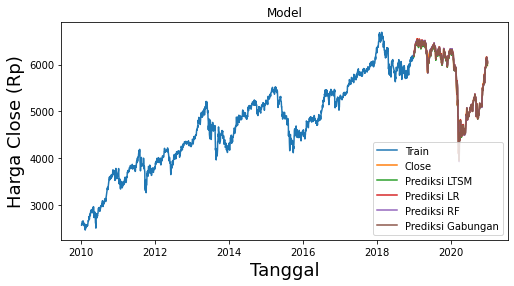

In [5]:
#plot 3 algor
import matplotlib.pyplot as plt

#Plot data
train=data[:training_data_len]
valid=data[training_data_len:]
valid['Prediksi LTSM']=predictions
valid['Prediksi LR']=predictions_regr_inv
valid['Prediksi RF']=predictions_rf_inv
valid['Prediksi Gabungan'] = (predictions+predictions_regr_inv+predictions_rf_inv)/3

#Visualisasi data
plt.figure(figsize=(8,4))
plt.title('Model')
plt.xlabel('Tanggal', fontsize=18)
plt.ylabel('Harga Close (Rp)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Prediksi LTSM', 'Prediksi LR' ,'Prediksi RF', 'Prediksi Gabungan']])
plt.legend(['Train', 'Close', 'Prediksi LTSM', 'Prediksi LR' ,'Prediksi RF', 'Prediksi Gabungan'], loc='lower right')
plt.show()

In [6]:
#hasil ensemble 3 algor
valid[['Close','Prediksi LTSM', 'Prediksi LR' ,'Prediksi RF', 'Prediksi Gabungan']]

,Close,Prediksi LTSM,Prediksi LR,Prediksi RF,Prediksi Gabungan
Date,,,,,
2019-01-02,6181.174805,6170.431641,6193.069728,6195.602208,6186.367859
2019-01-03,6221.009766,6159.187500,6190.201861,6186.759401,6178.716254
2019-01-04,6274.540039,6195.781250,6222.022067,6212.805171,6210.202829
2019-01-07,6287.224121,6243.022949,6272.067998,6276.870972,6263.987306
2019-01-08,6262.847168,6275.636719,6296.358329,6283.766452,6285.253833
...,...,...,...,...,...
2020-12-22,6023.289063,6149.132324,6163.437281,6155.085833,6155.885146
2020-12-23,6008.708984,6011.834473,6022.608701,6032.281831,6022.241668
2020-12-28,6093.554199,5980.995117,6004.652140,6010.084114,5998.577124


<ipython-input-7-1d407786ca61>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Prediksi LTSM']=predictions
<ipython-input-7-1d407786ca61>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Prediksi LR']=predictions_regr_inv
<ipython-input-7-1d407786ca61>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/i

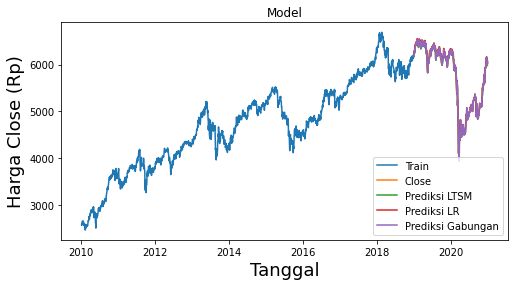

In [7]:
#plot LTSM dan LR
import matplotlib.pyplot as plt

#Plot data
train=data[:training_data_len]
valid=data[training_data_len:]
valid['Prediksi LTSM']=predictions
valid['Prediksi LR']=predictions_regr_inv
valid['Prediksi Gabungan'] = (predictions+predictions_regr_inv)/2

#Visualisasi data
plt.figure(figsize=(8,4))
plt.title('Model')
plt.xlabel('Tanggal', fontsize=18)
plt.ylabel('Harga Close (Rp)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Prediksi LTSM', 'Prediksi LR' , 'Prediksi Gabungan']])
plt.legend(['Train', 'Close', 'Prediksi LTSM', 'Prediksi LR' , 'Prediksi Gabungan'], loc='lower right')
plt.show()

In [8]:
#hasil ensemble LTSM dan LR
valid[['Close','Prediksi LTSM', 'Prediksi LR' , 'Prediksi Gabungan']]

,Close,Prediksi LTSM,Prediksi LR,Prediksi Gabungan
Date,,,,
2019-01-02,6181.174805,6170.431641,6193.069728,6181.750684
2019-01-03,6221.009766,6159.187500,6190.201861,6174.694680
2019-01-04,6274.540039,6195.781250,6222.022067,6208.901658
2019-01-07,6287.224121,6243.022949,6272.067998,6257.545473
2019-01-08,6262.847168,6275.636719,6296.358329,6285.997524
...,...,...,...,...
2020-12-22,6023.289063,6149.132324,6163.437281,6156.284803
2020-12-23,6008.708984,6011.834473,6022.608701,6017.221587
2020-12-28,6093.554199,5980.995117,6004.652140,5992.823629


<ipython-input-9-b5369586f11e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Prediksi LTSM']=predictions
<ipython-input-9-b5369586f11e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Prediksi RF']=predictions_rf_inv
<ipython-input-9-b5369586f11e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/ind

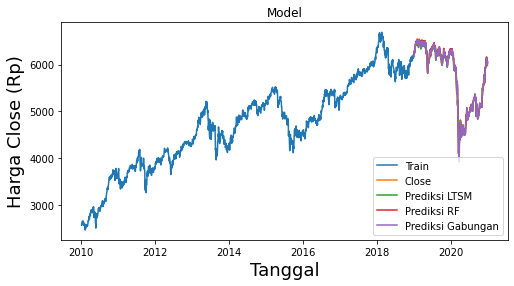

In [9]:
#plot LTSM & RF
import matplotlib.pyplot as plt

#Plot data
train=data[:training_data_len]
valid=data[training_data_len:]
valid['Prediksi LTSM']=predictions
valid['Prediksi RF']=predictions_rf_inv
valid['Prediksi Gabungan'] = (predictions+predictions_rf_inv)/2

#Visualisasi data
plt.figure(figsize=(8,4))
plt.title('Model')
plt.xlabel('Tanggal', fontsize=18)
plt.ylabel('Harga Close (Rp)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Prediksi LTSM' ,'Prediksi RF', 'Prediksi Gabungan']])
plt.legend(['Train', 'Close', 'Prediksi LTSM' ,'Prediksi RF', 'Prediksi Gabungan'], loc='lower right')
plt.show()

In [10]:
#hasil ensemble LTSM dan LR
valid[['Close','Prediksi LTSM', 'Prediksi RF' , 'Prediksi Gabungan']]

,Close,Prediksi LTSM,Prediksi RF,Prediksi Gabungan
Date,,,,
2019-01-02,6181.174805,6170.431641,6195.602208,6183.016924
2019-01-03,6221.009766,6159.187500,6186.759401,6172.973451
2019-01-04,6274.540039,6195.781250,6212.805171,6204.293210
2019-01-07,6287.224121,6243.022949,6276.870972,6259.946960
2019-01-08,6262.847168,6275.636719,6283.766452,6279.701586
...,...,...,...,...
2020-12-22,6023.289063,6149.132324,6155.085833,6152.109078
2020-12-23,6008.708984,6011.834473,6032.281831,6022.058152
2020-12-28,6093.554199,5980.995117,6010.084114,5995.539616


<ipython-input-11-876b768e398e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Prediksi LR']=predictions_regr_inv
<ipython-input-11-876b768e398e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Prediksi RF']=predictions_rf_inv
<ipython-input-11-876b768e398e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user

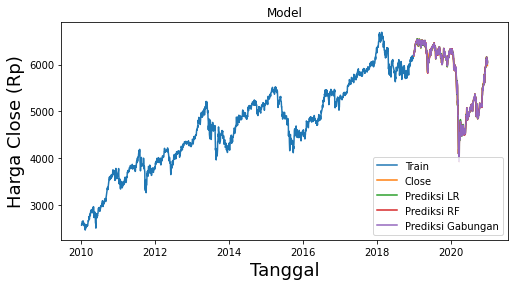

In [11]:
#plot LR & RF
import matplotlib.pyplot as plt

#Plot data
train=data[:training_data_len]
valid=data[training_data_len:]
valid['Prediksi LR']=predictions_regr_inv
valid['Prediksi RF']=predictions_rf_inv
valid['Prediksi Gabungan'] = (predictions_regr_inv+predictions_rf_inv)/2

#Visualisasi data
plt.figure(figsize=(8,4))
plt.title('Model')
plt.xlabel('Tanggal', fontsize=18)
plt.ylabel('Harga Close (Rp)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Prediksi LR' ,'Prediksi RF', 'Prediksi Gabungan']])
plt.legend(['Train', 'Close', 'Prediksi LR' ,'Prediksi RF', 'Prediksi Gabungan'], loc='lower right')
plt.show()

In [12]:
#hasil ensemble LTSM dan LR
valid[['Close','Prediksi LR', 'Prediksi RF' , 'Prediksi Gabungan']]

,Close,Prediksi LR,Prediksi RF,Prediksi Gabungan
Date,,,,
2019-01-02,6181.174805,6193.069728,6195.602208,6194.335968
2019-01-03,6221.009766,6190.201861,6186.759401,6188.480631
2019-01-04,6274.540039,6222.022067,6212.805171,6217.413619
2019-01-07,6287.224121,6272.067998,6276.870972,6274.469485
2019-01-08,6262.847168,6296.358329,6283.766452,6290.062391
...,...,...,...,...
2020-12-22,6023.289063,6163.437281,6155.085833,6159.261557
2020-12-23,6008.708984,6022.608701,6032.281831,6027.445266
2020-12-28,6093.554199,6004.652140,6010.084114,6007.368127


In [13]:
#rmse 3 algor
rmse_ensemble = (rmse + rmse_rf + rmse_regr)/3
rmse_ensemble

0.10152144734823039

In [14]:
#rmse LTSM dan RF
rmse_ensemble_2 = (rmse + rmse_rf)/2
rmse_ensemble_2

0.10212234104790538

In [15]:
#rmse LTSM dan LR
rmse_ensemble_3 = (rmse + rmse_regr)/2
rmse_ensemble_3

0.10036536663598102

In [16]:
#rmse RF dan LR
rmse_ensemble_4 = (rmse_rf + rmse_regr)/2
rmse_ensemble_4

0.10207663436080477